<table align="center" width=100%>
    <tr>
        <td>
            <div align="center">
                <font color="#21618C" size=24px>
                    <b>Buildings vs Forest
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

# Problem Statement:
This project aims to build a deep learning model that can classify images of buildings and forests.

# 1.Import tensorflow

Install stable version of tensorflow

In [2]:
!pip install tensorflow==2.0.0

     |████████████████████████████████| 86.3 MB 54 kB/s 
     |████████████████████████████████| 449 kB 60.6 MB/s 
     |████████████████████████████████| 50 kB 9.4 MB/s 
     |████████████████████████████████| 3.8 MB 70.8 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=86a24883d769e423eaac2b8a273945a58b7cbc8b10027be3b55b0272547d217d
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.7.0
    Uninstalling tensorflow-estimator-2.7.0:
      Successfully uninstalled tensorflow-estimator-2.7.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.7.0
    Uninstalling tensorboard-2.7.0:
      Successfully uninstalled tensorboard-2.7.0
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Success

In [3]:
# check version of tensorflow
import tensorflow as tf
print(tf.__version__)

2.0.0


Restart runtime

# 2.Import Libraries

In [4]:
# Import libraries and packages
import matplotlib as plt
%matplotlib inline
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import random
import pickle
import cv2
import os
import time   # time1 = time.time(); print('Time taken: {:.1f} seconds'.format(time.time() - time1))
import warnings
from tqdm import tqdm_notebook as tqdm
import itertools

warnings.filterwarnings("ignore")
SEED = 42   # set random seed

# 3. Load the data

Mount the google drive

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# Change the working directory
os.chdir('/content/drive/MyDrive/DL - Project 1 - ANN - Buildings vs Forests')

In [7]:
!dir

Class_Demo_ANN.ipynb  flagged
dataset		      Image\ Classification\ with\ ANN-Buildings\ vs\ Forest
dataset1	      model_ANN.h5
dataset2	      test_examples
dataset3	      test_examples.rar
dataset.rar


In [8]:
# unzip the dataset.rar file
!pip install patool

     |████████████████████████████████| 77 kB 6.9 MB/s 


In [9]:
import patoolib
patoolib.extract_archive('dataset.rar')

patool: Extracting dataset.rar ...
patool: running /usr/bin/unrar x -- "/content/drive/MyDrive/DL - Project 1 - ANN - Buildings vs Forests/dataset.rar"
patool:     with cwd='./Unpack_j0ija7ir'
patool: ... dataset.rar extracted to `dataset4' (local file exists).


'dataset4'

In [10]:
# initialize the data and labels
print("[INFO] loading images...")
time1 = time.time()   # to measure time taken
data = []
labels = []

classes = ["Forest", "Buildings"]

# grab the image paths and randomly shuffle them
imagePaths = sorted(list(paths.list_images('dataset')))   # data folder with 2 categorical folders
random.seed(SEED)
random.shuffle(imagePaths)

# progress bar 
with tqdm(total=len(imagePaths)) as pbar:
    
    # loop over the input images
    for imagePath in imagePaths:
        # load the image, resize the image to be 32x32 pixels (ignoring aspect ratio), 
        # flatten the 32x32x3=3072 pixel image into a list, and store the image in the data list
        image = cv2.imread(imagePath)
        image = cv2.resize(image, (32, 32)).flatten()
        data.append(image)

        # extract the class label from the image path and update the labels list
        label = imagePath.split(os.path.sep)[-2]
        
        label = 1 if label == "Buildings" else 0
        labels.append(label)
        
        # update the progressbar
        pbar.update(1)

# scale the raw pixel intensities to the range [0, 1]
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

print('Time taken: {:.1f} seconds'.format(time.time() - time1))   # to measure time taken
print("done")

[INFO] loading images...


  0%|          | 0/883 [00:00<?, ?it/s]

Time taken: 93.5 seconds
done


In [11]:
# check total images loaded
print("Total Images: ", len(data))

Total Images:  883


In [12]:
# sample data for first image
print("sample image: {}".format(data[0]))
print("no of features/pixels values: {}".format(len(data[0]))) # 32x32x3=3072
print("label: {}".format(classes[labels[0]]))

sample image: [0.31764706 0.29803922 0.28627451 ... 0.74117647 0.58823529 0.4627451 ]
no of features/pixels values: 3072
label: Forest


# 4. Data Partition

In [13]:
# partition the data into 80% training and 20% validation
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.2, random_state=SEED)

In [14]:
trainX.shape  

(706, 3072)

In [15]:
trainY.shape

(706,)

In [16]:
testX.shape

(177, 3072)

In [17]:
testY.shape

(177,)

In [18]:
# convert the labels from integers/categories to vectors 

trainY = to_categorical(trainY, num_classes=2)   # fit_transform = find all unique class labels + transform into one-hot encoded labels
testY = to_categorical(testY, num_classes=2)     # transform = perform the one-hot encoding (unique class labels already found)

# [0,1] Buildings
# [1,0] Forest

In [19]:
# check out a sample training image
sample_image = (trainX[5] * 255).astype("int")

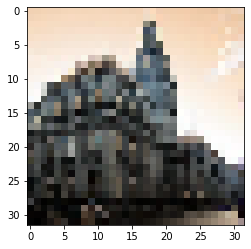

In [20]:
plt.imshow(sample_image.reshape(32,32,3))

In [21]:
trainY[5]   # [0,1] means buildings [1,0] means forest

array([0., 1.], dtype=float32)

# 5. Define the architecture for ANN MODEL

In [22]:
# define the 3072-1024-512-1 architecture using Keras

model = Sequential()   

# input layer 3072 as there are 32x32x3=3072 pixels in a flattened input image
# first hidden layer has 2048 nodes
model.add(Dense(units= 2048, input_shape=(3072,), kernel_initializer = 'uniform', activation="relu"))  

# # dropout for second layer 
# model.add(Dropout(0.4))

# second hidden layer has 1024 nodes
model.add(Dense(units=1024, kernel_initializer='uniform', activation="relu"))     

# third hidden layer has 512 nodes
model.add(Dense(units=512, kernel_initializer='uniform', activation="relu")) 

# fourth hidden layer has 256 nodes
model.add(Dense(units=256, kernel_initializer='uniform', activation="relu"))

 # output layer with number of possible class labels
model.add(Dense(units=2,kernel_initializer='uniform', activation="softmax"))           

# 6. Compiling your tensorflow ANN model

In [23]:
# initialize our initial learning rate and # of epochs to train for
INIT_LR = 0.01
EPOCHS = 100
 
# compile the model using SGD as our optimizer and categorical cross-entropy loss
# (you'll want to use binary_crossentropy for 2-class classification)
print("[INFO] compiling network network...")
opt = SGD(lr=INIT_LR)   # Stochastic Gradient Descent (SGD) optimizer
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] compiling network network...


In [24]:
# checking the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2048)              6293504   
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 514       
Total params: 9,048,322
Trainable params: 9,048,322
Non-trainable params: 0
_________________________________________________________________


# 7.Training model training data

In [25]:
# train the neural network on training data set
# batch_size (32) controls the size of each group of data to pass through the network. 

time1 = time.time()   # to measure time taken
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=EPOCHS, batch_size=32)
print('Time taken: {:.1f} seconds'.format(time.time() - time1))   # to measure time taken

Train on 706 samples, validate on 177 samples
Epoch 1/100
706/706 [==============================] - 2s 3ms/sample - loss: 0.6601 - accuracy: 0.5482 - val_loss: 0.6542 - val_accuracy: 0.5367
Epoch 2/100
706/706 [==============================] - 1s 2ms/sample - loss: 0.6312 - accuracy: 0.5567 - val_loss: 0.6369 - val_accuracy: 0.5537
Epoch 3/100
706/706 [==============================] - 1s 2ms/sample - loss: 0.6153 - accuracy: 0.5680 - val_loss: 0.6222 - val_accuracy: 0.5367
Epoch 4/100
706/706 [==============================] - 1s 2ms/sample - loss: 0.5934 - accuracy: 0.5921 - val_loss: 0.5818 - val_accuracy: 0.6723
Epoch 5/100
706/706 [==============================] - 1s 2ms/sample - loss: 0.5629 - accuracy: 0.6813 - val_loss: 0.5531 - val_accuracy: 0.6554
Epoch 6/100
706/706 [==============================] - 1s 2ms/sample - loss: 0.5312 - accuracy: 0.7507 - val_loss: 0.5716 - val_accuracy: 0.6215
Epoch 7/100
706/706 [==============================] - 1s 2ms/sample - loss: 0.5031 

# 8.Evaluating the model on the test data 

In [26]:
# evaluate the network
print("[INFO] evaluating network...")
pred_prob = model.predict(testX, batch_size=32)

[INFO] evaluating network...


### Convert testY and y_pred into 1's and 0 for classification report


In [27]:
# Note: buildings -> 1 and forest -> 0

In [28]:
test_y = [ np.argmax(i)  for i in testY]
pred_y = [ np.argmax(i)  for i in pred_prob]

In [29]:
def plot_confusion_metrix(y_true, y_pred,classes,
                         normalize=False,
                         title='Confusion Matrix',
                         cmap=plt.cm.Blues):
    """
    Objective
    ----------
    plot confussion matrix, classification report and accuracy score
    
    parameters
    ----------
    y_true : array-like of shape (n_samples,)
        Ground truth (correct) target values.

    y_pred : array-like of shape (n_samples,)
        Estimated targets as returned by a classifier.
    
    classes : list
        List of labels to index the matrix
        
    title : title for matrix
    cmap : colormap for matrix 
    
    returns 
    ----------
   all accruacy matrix 
    """
    
    
    cm = confusion_matrix(y_true,y_pred)
    
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print("Confusion Matrix, Without Normalisation")

    
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=35)
    plt.yticks(tick_marks,classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() /2.
    
    for i , j in itertools.product(range(cm.shape[0]), range(cm.shape[0])):
        plt.text(j, i, format(cm[i,j], fmt),
                 horizontalalignment='center',
                 color='white' if cm[i, j] > thresh else 'black')
    
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    # plt.tight_layout()
    
    plt.show()
    
    print("-----------------------------------------------------")
    print('Classification report')
    print(classification_report(y_true,y_pred))
    
    print("-----------------------------------------------------")
    acc= accuracy_score(y_true,y_pred)
    print("Accuracy of the model: ", acc)

Confusion Matrix, Without Normalisation


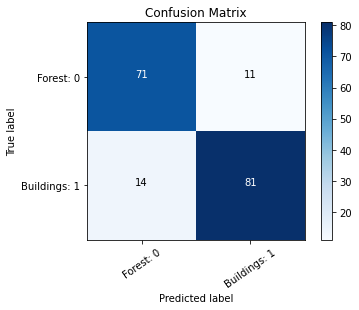

-----------------------------------------------------
Classification report
              precision    recall  f1-score   support

           0       0.84      0.87      0.85        82
           1       0.88      0.85      0.87        95

    accuracy                           0.86       177
   macro avg       0.86      0.86      0.86       177
weighted avg       0.86      0.86      0.86       177

-----------------------------------------------------
Accuracy of the model:  0.8587570621468926


In [30]:
# plot confusion matrix for the test data
plot_confusion_metrix(test_y, pred_y,classes=["Forest: 0","Buildings: 1"])

# 9. Generate Plots for accuracy and val loss

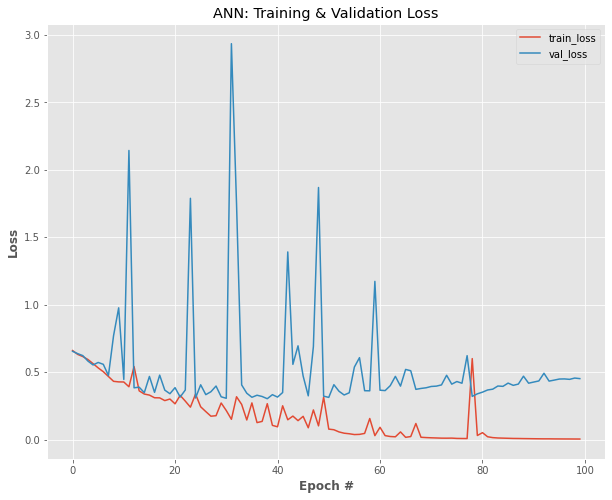

In [31]:

# plot the training and validation loss
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure(figsize = [10,8])
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.title("ANN: Training & Validation Loss")
plt.xlabel("Epoch #", weight="bold")
plt.ylabel("Loss", weight="bold")
plt.legend()
plt.show()

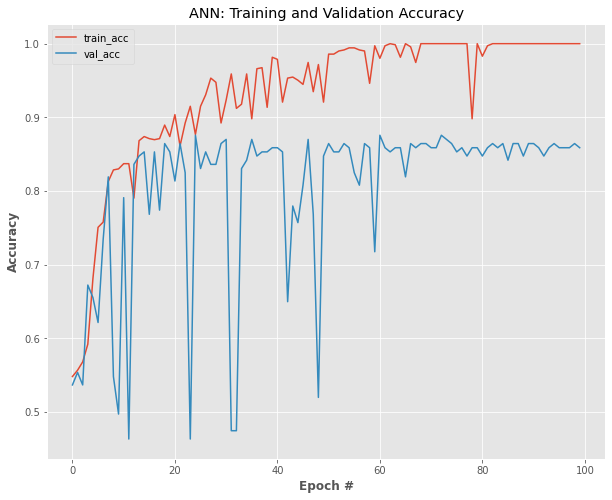

In [32]:
# plot the training and validation accuracy
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure(figsize = [10,8])
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.title("ANN: Training and Validation Accuracy")
plt.xlabel("Epoch #", weight="bold")
plt.ylabel("Accuracy", weight="bold")
plt.legend()
plt.show()

### 10. Saving the trained model 

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2048)              6293504   
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 514       
Total params: 9,048,322
Trainable params: 9,048,322
Non-trainable params: 0
_________________________________________________________________


In [35]:
# save the model and label binarizer to disk
print("[INFO] serializing network and label binarizer...")
model.save('model_ANN.h5')


[INFO] serializing network and label binarizer...


### 11.Making predictions using our trained tensorflow model

In [36]:
# import the necessary packages
from tensorflow.keras.models import load_model
import pickle
import cv2
import imutils
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
# # load the model 
# print("[INFO] loading network and...")
# model2 = load_model("model_ANN.h5")

In [38]:
def display_img(img):
    fig = plt.figure(figsize=(12,10))
    plt.grid(b=None)
    ax = fig.add_subplot(111)
    ax.imshow(img)

In [39]:
patoolib.extract_archive('test_examples.rar')

patool: Extracting test_examples.rar ...
patool: running /usr/bin/unrar x -- "/content/drive/My Drive/DL - Project 1 - ANN - Buildings vs Forests/test_examples.rar"
patool:     with cwd='./Unpack_owdblcuk'
patool: ... test_examples.rar extracted to `test_examples1' (local file exists).


'test_examples1'

In [40]:
# load the input image and resize it to the target spatial dimensions
width = 32
height = 32

# grab the image paths and randomly shuffle them
testImagePaths = sorted(list(paths.list_images('test_examples')))   # test data folder with random images


# progress bar 
with tqdm(total=len(testImagePaths)) as pbar:
    
    for imagePath in testImagePaths:
        image = cv2.imread(imagePath)
        output = image.copy()
        image = cv2.resize(image, (width, height))

        # scale the pixel values to [0, 1]
        image = image.astype("float") / 255.0

        # for a simple fully-connected network, flatten the image
        image = image.flatten()
        image = image.reshape((1, image.shape[0]))


        # make a prediction on the image
        preds = model.predict(image)

        # find the class label index with the largest corresponding probability
        i = preds.argmax(axis=1)[0]
        label = classes[i]
        
        label = "{}: {:.2f}%".format(label, preds[0][i] * 100)

        
        output = imutils.resize(output, width=400)
        cv2.putText(output, label, (10, 25),  cv2.FONT_HERSHEY_SIMPLEX,
            0.7, (0, 255, 0), 2)
        
        # convert img to rgb format and display in noteboo
        img = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)
        display_img(img)

#         print("############################")
#         print("image: {}".format(os.path.split(imagePath)[-1]))
#         print("predicted label: {}".format(label))
#         print("Confidence: {}".format(preds[0][i]))
        
        pbar.update(1)

Output hidden; open in https://colab.research.google.com to view.

## 11. Deployment using gradio

In [41]:
!pip install gradio

     |████████████████████████████████| 865 kB 24.0 MB/s 
     |████████████████████████████████| 2.0 MB 56.9 MB/s 
     |████████████████████████████████| 210 kB 69.5 MB/s 
     |████████████████████████████████| 61 kB 562 kB/s 
     |████████████████████████████████| 3.6 MB 67.7 MB/s 
     |████████████████████████████████| 856 kB 57.4 MB/s 
  Created wheel for ffmpy: filename=ffmpy-0.3.0-py3-none-any.whl size=4712 sha256=6891b671a8fbe04e343cbfef95ad85a653172f2e5f6dd75417362789050e1c1e
  Stored in directory: /root/.cache/pip/wheels/13/e4/6c/e8059816e86796a597c6e6b0d4c880630f51a1fcfa0befd5e6
  Created wheel for flask-cachebuster: filename=Flask_CacheBuster-1.0.0-py3-none-any.whl size=3373 sha256=974db332ccfcda387e8e6e94e187b79f121dd115ff6b93893c8502bbfac974e2
  Stored in directory: /root/.cache/pip/wheels/28/c0/c4/44687421dab41455be93112bd1b0dee1f3c5a9aa27bee63708
Successfully built ffmpy flask-cachebuster


In [42]:
import gradio as gr

In [43]:
def predict_image(image):
    
    image = cv2.resize(image, (32, 32))

    # scale the pixel values to [0, 1]
    image = image.astype("float") / 255.0

    # for a simple fully-connected network, flatten the image
    image = image.flatten()
    image = image.reshape((1, image.shape[0]))

    # make a prediction on the image
    preds = model.predict(image).flatten()
    result = dict()
    result["Forest"] = round(float(list(preds)[0]), 3)
    result["Buildings"] = round(float(list(preds)[1]), 3)
    print(result)
    
    return result

im = gr.inputs.Image(shape=(32,32))
label = gr.outputs.Label(num_top_classes=2)

gr.Interface(fn=predict_image, inputs=im, outputs=label, capture_session=True, title="ANN Demo").launch(share=True)

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://49667.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


(<Flask 'gradio.networking'>,
 'http://127.0.0.1:7860/',
 'https://49667.gradio.app')

# 12. CONCLUSIONS:

#### The ANN model gives 86% accuracy and gives good results. But the plots of accuracy and loss for training and validation show a gap between accuracy and loss for training and validation data, which is a clear indication of overfitting. Hence, we need to approach the problem using a different neural network architecture like CNN which is mostly used for image recognition problems instead of ANN which is used mostly for tabular data and text data.